In [7]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [8]:
lr = pd.read_csv('data/kc_house_data_cleaned.csv')


In [9]:
lr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,2,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,2,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,4,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,2,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,2,8,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0,0,2,8,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0,0,2,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0,0,2,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [10]:
lr['sqft_diff'] = lr['sqft_lot'] -lr['sqft_living']

In [11]:
lr['sqft_diff']

0        4470
1        4672
2        9230
3        3040
4        6400
         ... 
21592    -399
21593    3503
21594     330
21595     788
21596      56
Name: sqft_diff, Length: 21597, dtype: int64

In [12]:
lr['sqft_diff_ratio'] = lr['sqft_diff'] / lr['sqft_lot']

Defining the model variables

In [13]:
#col_selectors = ['bedrooms','sqft_living','sqft_lot']
col_selectors= ['bedrooms','yr_built','sqft_living','grade','bathrooms','zipcode','waterfront','sqft_diff_ratio','view']
y = lr['price']
x = lr[col_selectors]

In [14]:
import statsmodels.api as sm
X_aug = sm.add_constant(x)
res = sm.OLS(y, X_aug).fit()

In [15]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     4595.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:05:36   Log-Likelihood:            -2.9583e+05
No. Observations:               21597   AIC:                         5.917e+05
Df Residuals:                   21587   BIC:                         5.918e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.606e+07   3.09e+06      8.438      0.000       2e+07    3.21e+07
bedrooms        -4.014e+04   2102.113    -19.096      0.000   -4.43e+04    -3.6e+04
yr_built        -3950.9122     65.642    -60.189      0.000   -4079.576   -3822.249
sqft_living       177.9409      3.302     53.881      0.000     171.468     184.414
grade            1.236e+05   2109.611     58.567      0.000    1.19e+05    1.28e+05
bathrooms        3.881e+04   3425.362     11.331      0.000    3.21e+04    4.55e+04
zipcode          -193.0162     31.025     -6.221      0.000    -253.828    -132.205
waterfront       6.244e+05   1.94e+04     32.257      0.000    5.86e+05    6.62e+05
sqft_diff_ratio -1.235e+05   6228.633    -19.826      0.000   -1.36e+05   -1.11e+05
view             4.573e+04   2202.262     20.767      0.000    4.14e+04    5.01e+04
==============================================================================
Omnibus:                    16122.304   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1121145.983
Skew:                           2.988   Prob(JB):                         0.00
Kurtosis:                      37.788   Cond. No.                     2.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1

In [16]:
lr_model = LinearRegression()
lr_model

LinearRegression()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [18]:
print(len(X_train))
print(len(X_test))

15117
6480


In [19]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [20]:
lr_model.coef_

array([-4.19458542e+04, -3.94302147e+03,  1.76826240e+02,  1.24422670e+05,
        3.72147248e+04, -1.74953311e+02,  6.27239161e+05, -1.23476249e+05,
        4.25246044e+04])

In [21]:
lr_model.intercept_

24282202.541489456

In [22]:
lr_model.score(X_train, y_train)

0.6539725286832676

Testing the model

In [23]:
lr_model.score(X_test, y_test)

0.663550400762617

In [24]:
# This gets the predictions of model on test set.
y_pred = lr_model.predict(X_test)
#get first ten elements of prediction.
y_pred[0:10]

array([ 354116.5890866 ,  401896.61771012,  427291.34725318,
        501756.61754625,  396110.23805042,  247478.14436299,
       1175697.85728155,  315007.19467034,  394632.01990863,
        521378.56715356])

/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


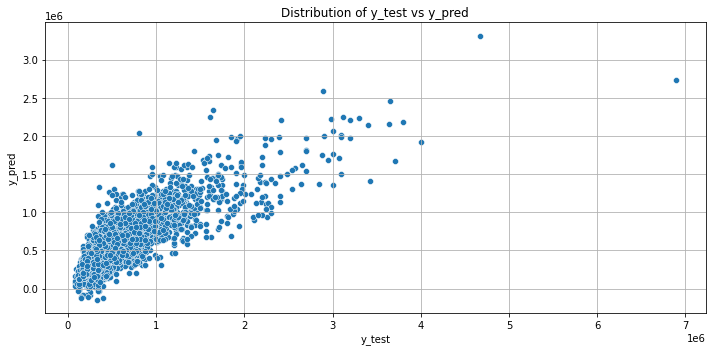

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(y_test, y_pred)
plt.rcParams.update({'font.size':10})
ax.set_xlabel('y_test')
ax.set_ylabel("y_pred")
ax.set_title('Distribution of y_test vs y_pred')
plt.grid()
plt.tight_layout()
plt.show();

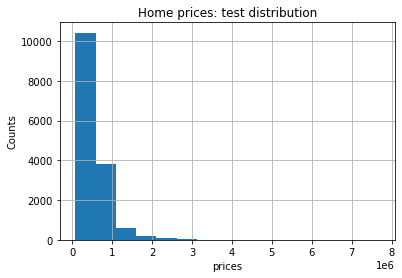

In [26]:

fig, ax = plt.subplots()
y_train.hist(bins = 15, ax = ax)
ax.set_xlabel('prices')
ax.set_ylabel('Counts')
ax.set_title('Home prices: test distribution')
plt.show()

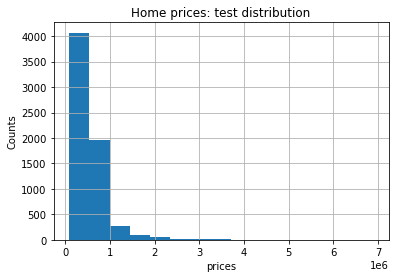

In [27]:

fig, ax = plt.subplots()
y_test.hist(bins = 15, ax = ax)
ax.set_xlabel('prices')
ax.set_ylabel('Counts')
ax.set_title('Home prices: test distribution')
plt.show()

2

Dummies

In [28]:
lr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_diff,sqft_diff_ratio
0,221900.0,3,1.00,1180,5650,1.0,0,0,2,7,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,4470,0.791150
1,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,4672,0.645126
2,180000.0,2,1.00,770,10000,1.0,0,0,2,6,...,0,1933,0.0,98028,47.7379,-122.233,2720,8062,9230,0.923000
3,604000.0,4,3.00,1960,5000,1.0,0,0,4,7,...,910,1965,0.0,98136,47.5208,-122.393,1360,5000,3040,0.608000
4,510000.0,3,2.00,1680,8080,1.0,0,0,2,8,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,6400,0.792079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,2,8,...,0,2009,0.0,98103,47.6993,-122.346,1530,1509,-399,-0.352785
21593,400000.0,4,2.50,2310,5813,2.0,0,0,2,8,...,0,2014,0.0,98146,47.5107,-122.362,1830,7200,3503,0.602615
21594,402101.0,2,0.75,1020,1350,2.0,0,0,2,7,...,0,2009,0.0,98144,47.5944,-122.299,1020,2007,330,0.244444
21595,400000.0,3,2.50,1600,2388,2.0,0,0,2,8,...,0,2004,0.0,98027,47.5345,-122.069,1410,1287,788,0.329983


In [29]:
lr['sqft_living_squared'] = lr['sqft_living']**2


lr['sqft_lot_squared'] = lr['sqft_lot']**2
lr['sqft_diff_squared'] = lr['sqft_lot_squared'] - lr['sqft_living_squared'] 

In [30]:
lr.to_csv('lr_features.csv',index=False)

In [219]:
df_dummies = pd.get_dummies(lr, columns=['zipcode'])
df_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,2,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,2,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,2,8,...,0,0,0,0,0,0,0,0,0,0


In [220]:
df_dummies.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_diff', 'sqft_diff_ratio',
       'sqft_living_squared', 'sqft_lot_squared', 'sqft_diff_squared',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode

In [221]:
df_dummies.drop('price', axis = 1, inplace=True)



In [222]:
#df_dummies.drop('yr_renovated', axis = 1, inplace=True)
df_dummies.drop('sqft_living15', axis = 1, inplace=True)
df_dummies.drop('sqft_above', axis = 1, inplace=True)

In [241]:
df_dummies.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_lot15', 'sqft_diff',
       'sqft_diff_ratio', 'sqft_living_squared', 'sqft_lot_squared',
       'sqft_diff_squared', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072

In [224]:
#col_selectors = ['bedrooms','sqft_living','sqft_lot']
#col_selectors1= ['bedrooms','yr_built','grade','bathrooms','waterfront','view','zipcode','sqft_living','sqft_lot','sqft_living_squared','sqft_lot_squared']
y1 = lr['price']
x1 = df_dummies

In [225]:
import statsmodels.api as sm
X_aug = sm.add_constant(x1)
res = sm.OLS(y1, X_aug).fit()

In [226]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1224.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:40:27   Log-Likelihood:            -2.8823e+05
No. Observations:               21597   AIC:                         5.766e+05
Df Residuals:                   21510   BIC:                         5.773e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.248e+07   5.74e+06     -5.662      0.000   -4.37e+07   -2.12e+07
bedrooms            -1.147e+04   1565.118     -7.328      0.000   -1.45e+04   -8401.124
bathrooms            2.946e+04   2488.522     11.840      0.000    2.46e+04    3.43e+04
sqft_living           163.8196   1366.767      0.120      0.905   -2515.145    2842.784
sqft_lot             -153.3382   1367.084     -0.112      0.911   -2832.924    2526.248
floors              -1.268e+04   3281.419     -3.863      0.000   -1.91e+04   -6244.973
waterfront           6.448e+05   1.39e+04     46.453      0.000    6.18e+05    6.72e+05
view                 5.493e+04   1616.735     33.976      0.000    5.18e+04    5.81e+04
condition            2.929e+04   1811.026     16.173      0.000    2.57e+04    3.28e+04
grade                6.801e+04   1677.319     40.548      0.000    6.47e+04    7.13e+04
sqft_basement         -48.7140      3.500    -13.917      0.000     -55.575     -41.853
yr_built             -430.3423     64.315     -6.691      0.000    -556.405    -304.279
yr_renovated           23.9222      3.018      7.926      0.000      18.006      29.838
lat                    2.3e+05   5.98e+04      3.844      0.000    1.13e+05    3.47e+05
long                -1.847e+05   4.31e+04     -4.285      0.000   -2.69e+05      -1e+05
sqft_lot15             -0.2216      0.061     -3.606      0.000      -0.342      -0.101
sqft_diff             153.4859   1367.092      0.112      0.911   -2526.116    2833.088
sqft_diff_ratio      8.143e+04   6510.406     12.508      0.000    6.87e+04    9.42e+04
sqft_living_squared -1.059e+06   8.86e+06     -0.120      0.905   -1.84e+07    1.63e+07
sqft_lot_squared     1.059e+06   8.86e+06      0.120      0.905   -1.63e+07    1.84e+07
sqft_diff_squared   -1.059e+06   8.86e+06     -0.120      0.905   -1.84e+07    1.63e+07
zipcode_98001        -6.21e+05   7.98e+04     -7.779      0.000   -7.77e+05   -4.64e+05
zipcode_98002       -5.901e+05   7.78e+04     -7.587      0.000   -7.43e+05   -4.38e+05
zipcode_98003       -6.481e+05   8.16e+04     -7.944      0.000   -8.08e+05   -4.88e+05
zipcode_98004        8.905e+04   8.39e+04      1.062      0.288   -7.53e+04    2.53e+05
zipcode_98005        -3.58e+05   8.28e+04     -4.324      0.000    -5.2e+05   -1.96e+05
zipcode_98006       -3.945e+05      8e+04     -4.929      0.000   -5.51e+05   -2.38e+05
zipcode_98007       -4.179e+05    8.2e+04     -5.098      0.000   -5.79e+05   -2.57e+05
zipcode_98008       -4.073e+05   8.06e+04     -5.053      0.000   -5.65e+05   -2.49e+05
zipcode_98010        -5.08e+05   7.08e+04     -7.178      0.000   -6.47e+05   -3.69e+05
zipcode_98011       -5.738e+05   8.82e+04     -6.507      0.000   -7.47e+05   -4.01e+05
zipcode_98014       -5.259e+05   7.44e+04     -7.072      0.000   -6.72e+05    -3.8e+05
zip

In [227]:
lr_model1 = LinearRegression()
lr_model1

LinearRegression()

Training the data


In [228]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3)

In [229]:
print(len(X_train1))
print(len(X_test1))

15117
6480


In [230]:
#X_train_standard = X_train1.apply(lambda x: (x - x.mean())/x.std())
#X_test_standard = X_test1.apply(lambda x: (x - x.mean())/x.std())

In [32]:
lr_model1.fit(X_train1, y_train1)

NameError: name 'lr_model1' is not defined

In [232]:
lr_model.coef_

array([-1.35373366e+04,  3.04959663e+04,  3.46088809e+03, -3.42914709e+03,
       -1.25639701e+04,  6.06325811e+05,  6.11533944e+04,  3.05307102e+04,
        6.89307715e+04, -4.94962877e+01, -4.79787668e+02,  2.38471419e+01,
        2.24030063e+05, -1.90513743e+05, -3.58789155e-01,  3.42932023e+03,
        8.52316715e+04, -5.86215892e+07,  5.86215892e+07, -5.86215892e+07,
       -1.55630938e+05, -1.30766601e+05, -1.85861485e+05,  5.32291794e+05,
        1.03277923e+05,  5.82050275e+04,  4.41388435e+04,  5.98191239e+04,
       -3.34071583e+04, -1.09233449e+05, -5.22764521e+04, -9.27071520e+04,
       -9.02111598e+04, -2.06803176e+05,  1.05089271e+04,  1.86655406e+04,
       -1.22515083e+05,  5.73792058e+04, -1.49945048e+05, -1.54221570e+05,
       -1.77981505e+05,  1.41094842e+05, -4.14578663e+04, -8.48213382e+04,
        9.79771890e+05,  2.86433962e+05, -1.37835528e+05, -1.24537664e+04,
        3.02158902e+04,  2.84975127e+03, -1.31232445e+05, -8.75010184e+04,
       -1.34313020e+05, -

In [233]:
lr_model.intercept_

-33302341.93608168

In [234]:
lr_model.score(X_train1, y_train1)

0.8249808811946289

In [235]:
lr_model.score(X_test1, y_test1)

0.8381713804366182

In [236]:
# This gets the predictions of model on test set.
y_pred1 = lr_model.predict(X_test1)
#get first ten elements of prediction.
y_pred1[0:10]

array([ 429303.98224239,  856809.64601573,  691880.74546212,
        393336.20256134,  893301.2103292 , 1035385.46968393,
         75933.94021301,  136056.69511864,  370665.45974781,
         36240.87558554])

/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


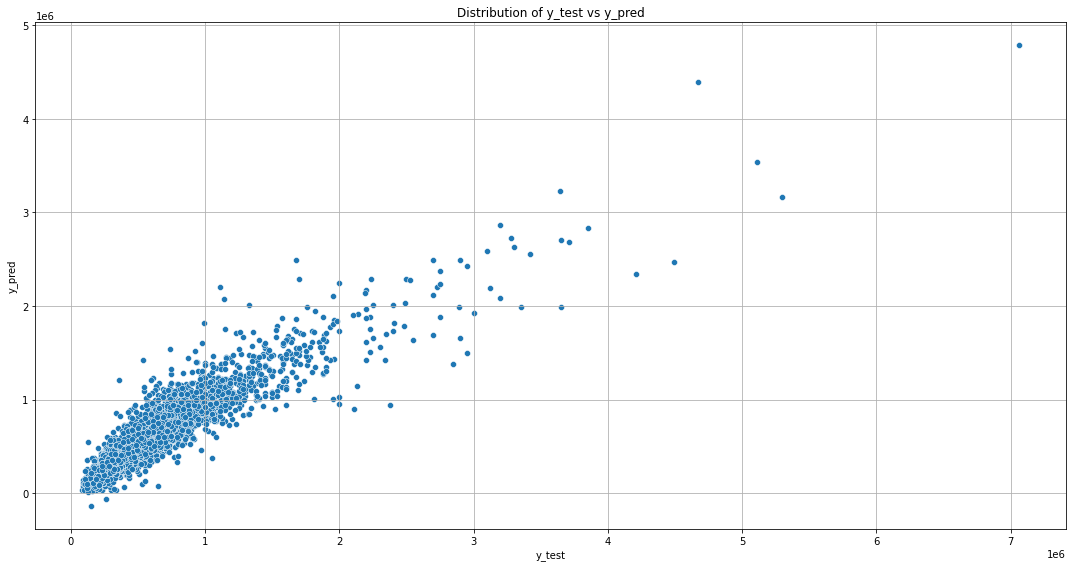

In [237]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(y_test1, y_pred1)
plt.rcParams.update({'font.size':10})
ax.set_xlabel('y_test')
ax.set_ylabel("y_pred")
ax.set_title('Distribution of y_test vs y_pred')
plt.grid()
plt.tight_layout()
plt.show();

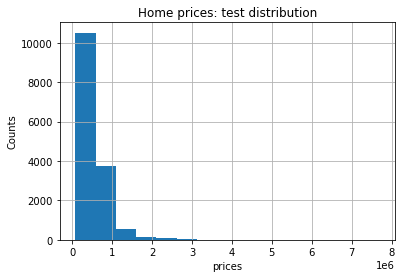

In [238]:

fig, ax = plt.subplots()
y_train1.hist(bins = 15, ax = ax)
ax.set_xlabel('prices')
ax.set_ylabel('Counts')
ax.set_title('Home prices: test distribution')
plt.show()

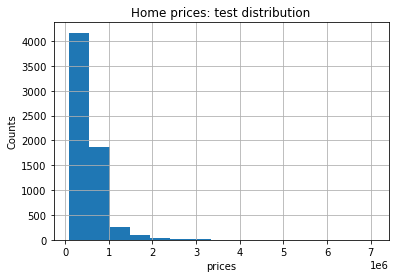

In [239]:
fig, ax = plt.subplots()
y_test1.hist(bins = 15, ax = ax)
ax.set_xlabel('prices')
ax.set_ylabel('Counts')
ax.set_title('Home prices: test distribution')
plt.show()

In [240]:
df_dummies

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,0,0,2,7,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0,2,7,400,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,2,6,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,4,7,910,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,2,8,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,2,8,0,...,0,0,0,0,0,0,0,0,0,0
21593,4,2.50,2310,5813,2.0,0,0,2,8,0,...,1,0,0,0,0,0,0,0,0,0
21594,2,0.75,1020,1350,2.0,0,0,2,7,0,...,0,0,0,0,0,0,0,0,0,0
21595,3,2.50,1600,2388,2.0,0,0,2,8,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
lr1 = pd.read_csv('data/Han_Chosen_Features_df.csv')

In [6]:
lr1

,price,sqft_living,bedrooms,bathrooms,condition,floors,sqft_lot,sqft_above,sqft_basement,BR/BTH,...,living_per_lot,grade,yr_built,yr_renovated,yr_built_pd,renovated,built_and_renovated,zipcode,view,waterfront
0,221900.0,1180,3,1.00,2,1.0,5650,1180,0,3.00,...,0.21,7,1955,0.0,6,0,60,98178,0,0
1,538000.0,2570,3,2.25,2,2.0,7242,2170,400,1.33,...,0.30,7,1951,1991.0,6,1,18,98125,0,0
2,180000.0,770,2,1.00,2,1.0,10000,770,0,2.00,...,0.08,6,1933,0.0,4,0,40,98028,0,0
3,604000.0,1960,4,3.00,4,1.0,5000,1050,910,1.33,...,0.21,7,1965,0.0,7,0,70,98136,0,0
4,510000.0,1680,3,2.00,2,1.0,8080,1680,0,1.50,...,0.21,8,1987,0.0,9,0,90,98074,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,3,2.50,2,3.0,1131,1530,0,1.20,...,1.35,8,2009,0.0,11,0,110,98103,0,0
21593,400000.0,2310,4,2.50,2,2.0,5813,2310,0,1.60,...,0.40,8,2014,0.0,12,0,120,98146,0,0
21594,402101.0,1020,2,0.75,2,2.0,1350,1020,0,2.67,...,0.76,7,2009,0.0,11,0,110,98144,0,0
21595,400000.0,1600,3,2.50,2,2.0,2388,1600,0,1.20,...,0.67,8,2004,0.0,11,0,110,98027,0,0
